In [8]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import fewshot_functions as fs

In [2]:
# Load model off .keras file
model = keras.models.load_model('mobilenetv3_fewshot.keras', compile=False)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,976 (3.86 MB)

 Trainable params: 73,856 (288.50 KB)

 Non-trainable params: 939,120 (3.58 MB)

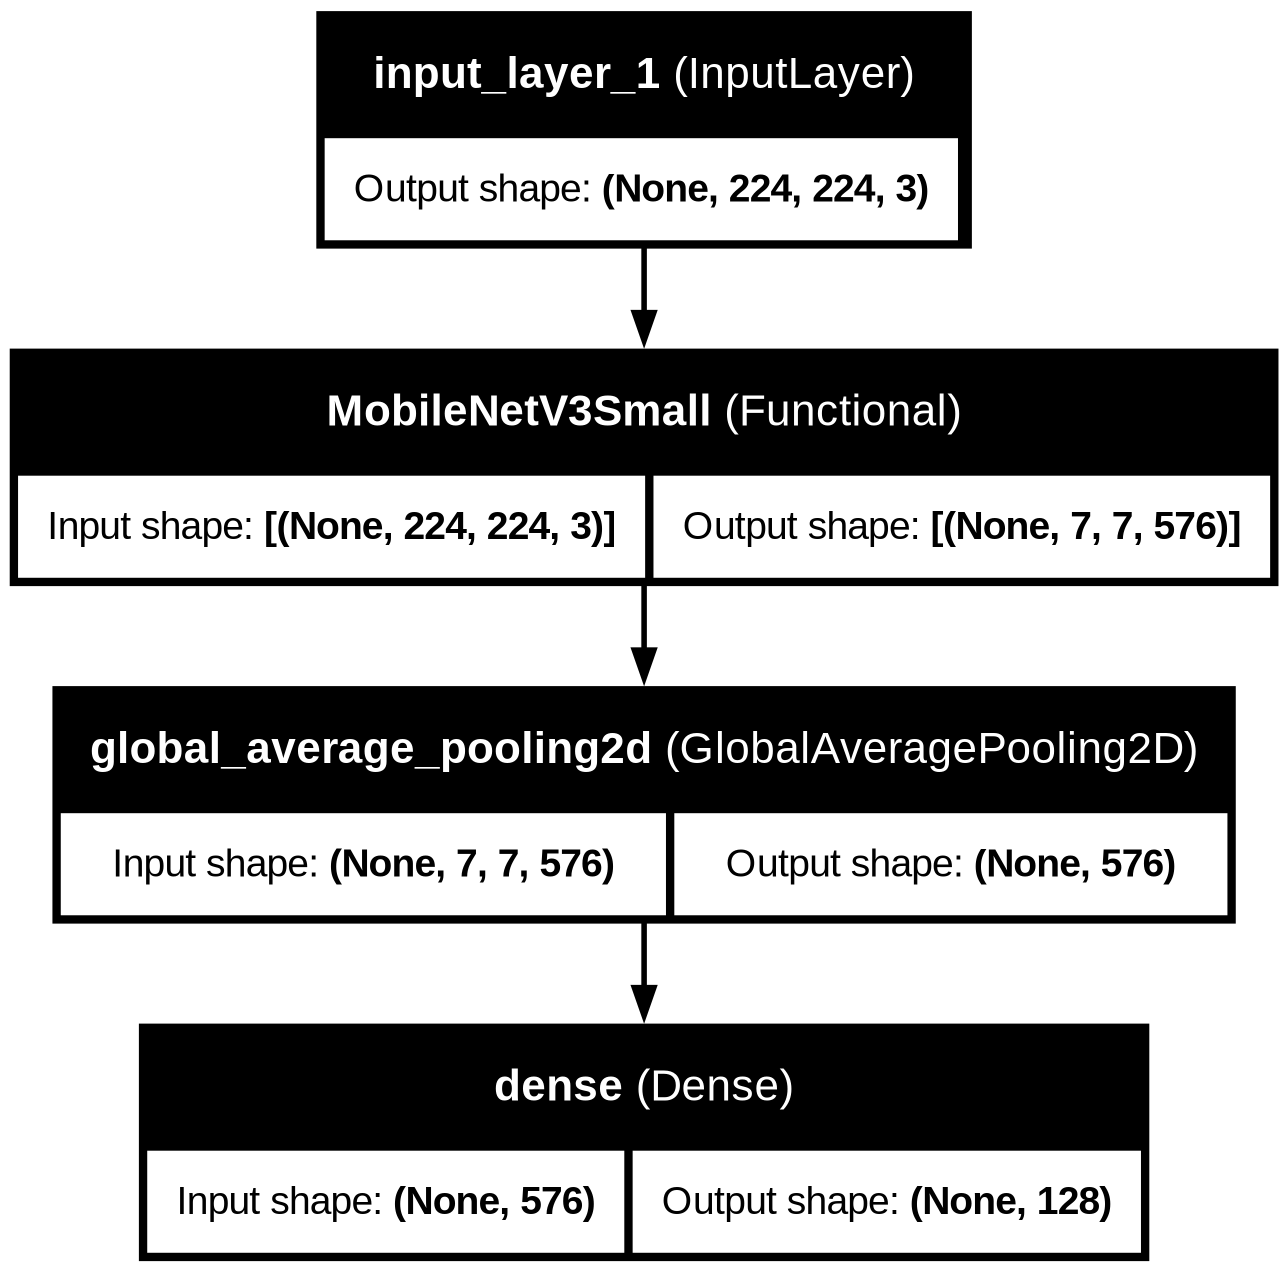

In [3]:
# Print model summary
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
# Define dataset parameters
batch_size = 32
img_size = (224, 224)  # Resize images to 224x224 (adjust to your model's input size)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'data',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    validation_split=0.2,      # 20% validation
    subset="validation",       # This is the validation set
    seed=123
)

# Normalize the pixel values to [0, 1] range (from 0-255)
normalization_layer = tf.keras.layers.Rescaling(1./255)
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

# Prefetch data for better performance
AUTOTUNE = tf.data.AUTOTUNE
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 9695 files belonging to 97 classes.
Using 1939 files for validation.


In [16]:
# Display class counts
fs.print_class_counts(validation_dataset)

Class counts:
Class 64: 19
Class 10: 14
Class 5: 16
Class 23: 19
Class 74: 21
Class 83: 17
Class 32: 20
Class 45: 23
Class 90: 20
Class 76: 24
Class 37: 18
Class 50: 23
Class 69: 12
Class 15: 23
Class 68: 20
Class 33: 26
Class 1: 20
Class 18: 15
Class 63: 18
Class 40: 28
Class 54: 25
Class 49: 18
Class 55: 18
Class 47: 20
Class 29: 25
Class 82: 22
Class 62: 23
Class 38: 18
Class 91: 25
Class 73: 20
Class 70: 23
Class 16: 18
Class 92: 21
Class 43: 21
Class 86: 24
Class 57: 17
Class 78: 24
Class 2: 19
Class 61: 18
Class 27: 13
Class 13: 25
Class 0: 25
Class 22: 28
Class 52: 19
Class 67: 28
Class 36: 19
Class 44: 27
Class 6: 22
Class 72: 25
Class 26: 20
Class 88: 14
Class 59: 19
Class 71: 16
Class 12: 20
Class 39: 24
Class 84: 23
Class 41: 23
Class 93: 22
Class 4: 21
Class 28: 19
Class 85: 18
Class 14: 17
Class 25: 23
Class 8: 13
Class 17: 22
Class 48: 22
Class 35: 20
Class 65: 13
Class 89: 20
Class 3: 13
Class 94: 12
Class 66: 21
Class 9: 16
Class 87: 21
Class 19: 28
Class 11: 21
Class 9

2025-04-04 01:32:56.383372: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
min_class_count = fs.get_min_class_size(validation_dataset)
print(min_class_count)

11


In [23]:
# Load models
support_images, support_labels, query_images, query_labels = fs.sample_episode(validation_dataset, num_classes=5, shots=5, queries=min_class_count)

ValueError: Not enough classes with at least 16 examples. Found 0.

In [ ]:
# Extract embeddings
support_embeddings = model(support_images, training=False)
query_embeddings = model(query_images,   training=False)